# Explore here

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)

# Seleccionar solo las columnas de interés
data = data[['Latitude', 'Longitude', 'MedInc']]

# Dividir el conjunto de datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Visualizar las primeras filas del conjunto de entrenamiento y prueba
print(train_data.head())
print(test_data.head())

       Latitude  Longitude  MedInc
14196     32.71    -117.03  3.2596
8267      33.77    -118.16  3.8125
17445     34.66    -120.48  4.1563
14265     32.69    -117.11  1.9425
2271      36.78    -119.80  3.5542
       Latitude  Longitude  MedInc
20046     36.06    -119.01  1.6812
3024      35.14    -119.46  2.5313
15663     37.80    -122.44  3.4801
20484     34.28    -118.72  5.7376
9814      36.62    -121.93  3.7250


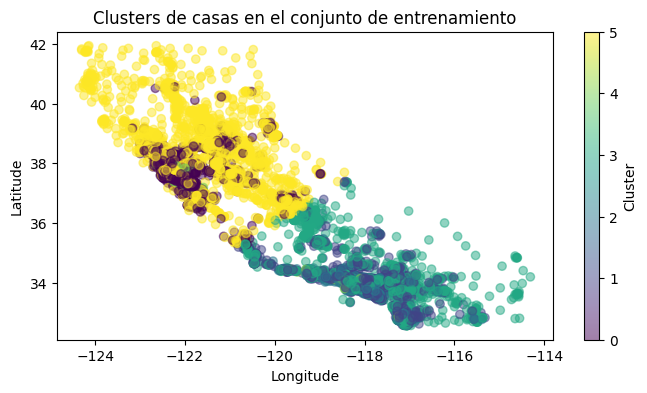

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Crear y entrenar el modelo K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(train_data[['Latitude', 'Longitude', 'MedInc']])

# Asignar los clusters al conjunto de entrenamiento
train_data['cluster'] = kmeans.labels_

# Visualizar los clusters en el conjunto de entrenamiento
plt.figure(figsize=(8, 4))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas en el conjunto de entrenamiento')
plt.colorbar(label='Cluster')
plt.show()

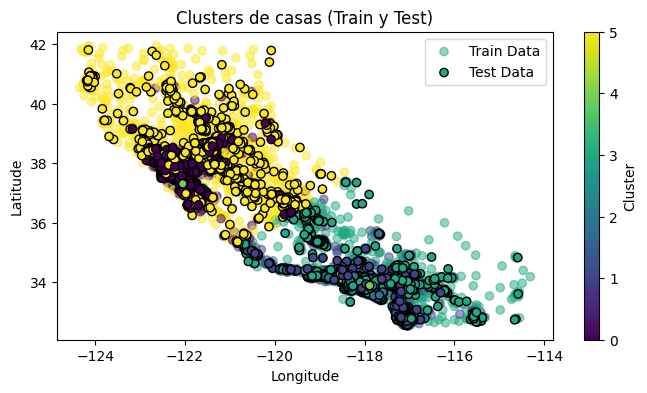

In [4]:
# Predecir los clusters para el conjunto de prueba
test_data['cluster'] = kmeans.predict(test_data[['Latitude', 'Longitude', 'MedInc']])

# Visualizar los clusters para el conjunto de prueba
plt.figure(figsize=(8, 4))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis', alpha=0.5, label='Train Data')
plt.scatter(test_data['Longitude'], test_data['Latitude'], c=test_data['cluster'], cmap='viridis', edgecolor='k', label='Test Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas (Train y Test)')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Seleccionar las características y etiquetas del conjunto de entrenamiento
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]
y_train = train_data['cluster']

# Entrenar el modelo de clasificación supervisada
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Seleccionar las características del conjunto de prueba
X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['cluster']

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



In [ ]:
import joblib

# Guardar el modelo K-Means
joblib.dump(kmeans, 'kmeans_model.pkl')

# Guardar el modelo supervisado
joblib.dump(clf, 'supervised_model.pkl')

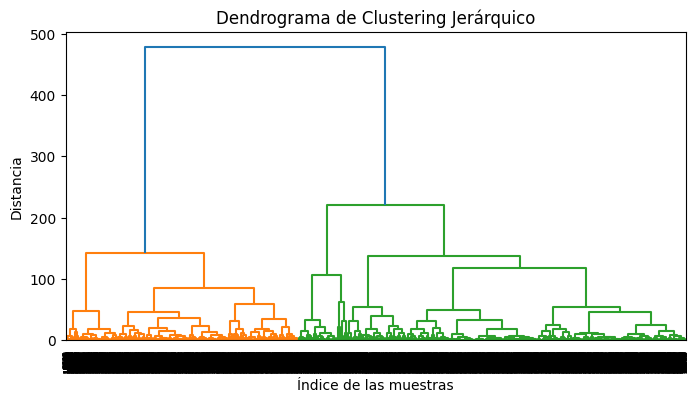

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Crear el linkage matrix
Z = linkage(train_data[['Latitude', 'Longitude', 'MedInc']], method='ward')

# Graficar el dendograma
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de las muestras")
plt.ylabel("Distancia")
plt.show()

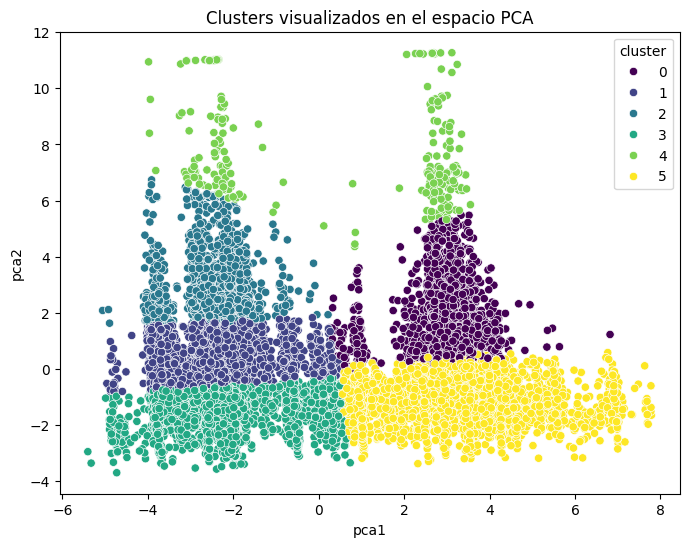

In [7]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
components = pca.fit_transform(train_data[['Latitude', 'Longitude', 'MedInc']])
train_data['pca1'] = components[:, 0]
train_data['pca2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=train_data, palette='viridis')
plt.title('Clusters visualizados en el espacio PCA')
plt.show()

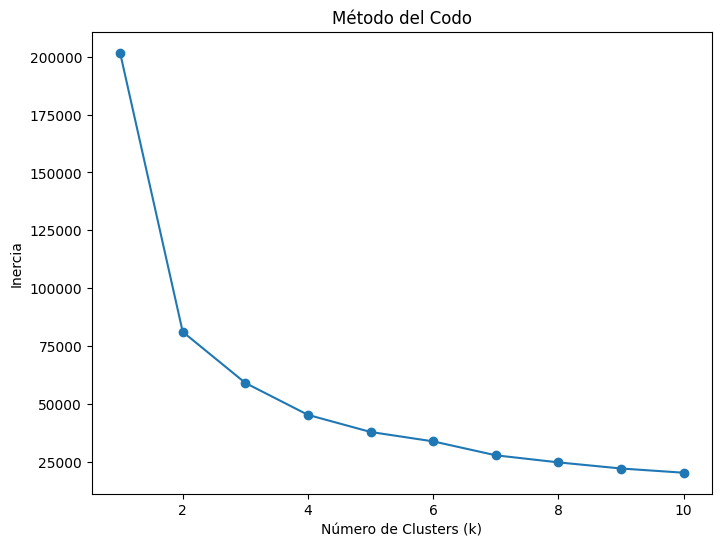

In [8]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data[['Latitude', 'Longitude', 'MedInc']])
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [9]:
from sklearn.metrics import silhouette_score

# Calcular el índice de silueta
silhouette_avg = silhouette_score(train_data[['Latitude', 'Longitude', 'MedInc']], train_data['cluster'])
print(f'Índice de Silueta: {silhouette_avg}')

Índice de Silueta: 0.3410613048058064


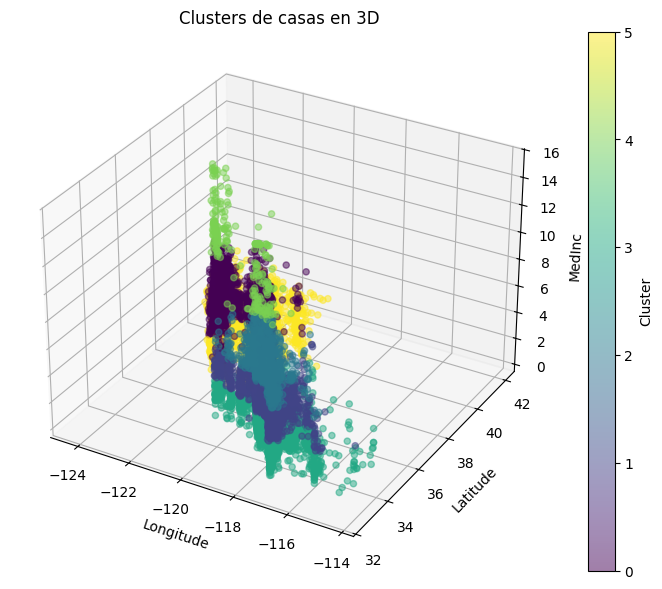

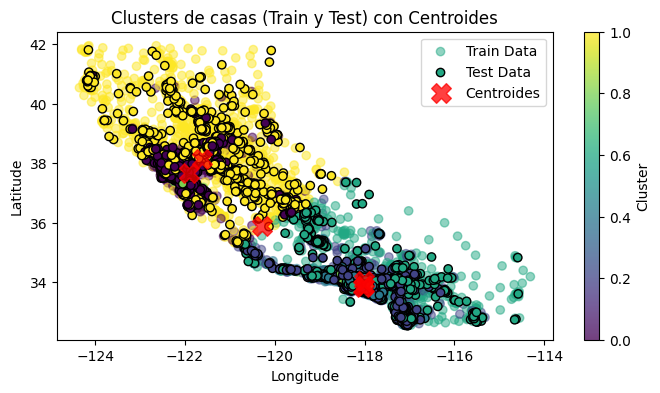

Índice de Silueta: 0.3411
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



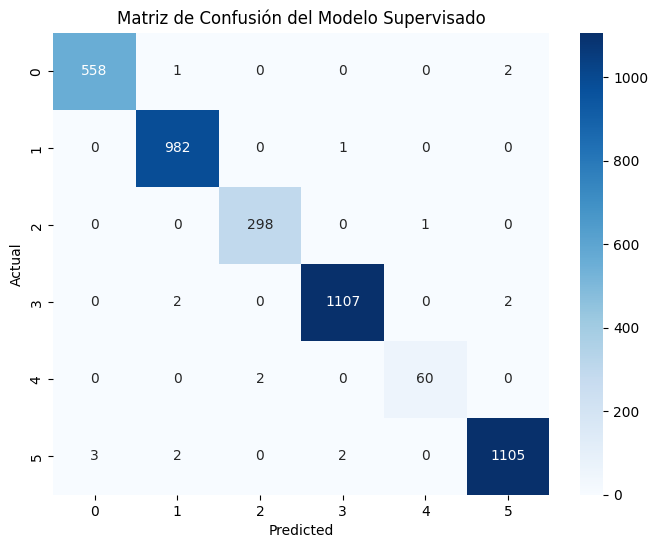

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, silhouette_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)

# Seleccionar solo las columnas de interés
data = data[['Latitude', 'Longitude', 'MedInc']]

# Dividir el conjunto de datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Crear y entrenar el modelo K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(train_data[['Latitude', 'Longitude', 'MedInc']])
train_data['cluster'] = kmeans.labels_

# Predecir los clusters para el conjunto de prueba
test_data['cluster'] = kmeans.predict(test_data[['Latitude', 'Longitude', 'MedInc']])

# Visualización 3D de los clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(train_data['Longitude'], train_data['Latitude'], train_data['MedInc'], c=train_data['cluster'], cmap='viridis', alpha=0.5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')
plt.title('Clusters de casas en 3D')
plt.colorbar(sc, label='Cluster')
plt.show()

# Añadir centroides al gráfico 2D
centroids = kmeans.cluster_centers_
plt.figure(figsize=(8, 4))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis', alpha=0.5, label='Train Data')
plt.scatter(test_data['Longitude'], test_data['Latitude'], c=test_data['cluster'], cmap='viridis', edgecolor='k', label='Test Data')
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=200, alpha=0.75, marker='X', label='Centroides')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas (Train y Test) con Centroides')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

# Calcular y mostrar el índice de silueta
silhouette_avg = silhouette_score(train_data[['Latitude', 'Longitude', 'MedInc']], train_data['cluster'])
print(f'Índice de Silueta: {silhouette_avg:.4f}')

# Entrenar el modelo de clasificación supervisada
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]
y_train = train_data['cluster']
X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['cluster']

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión del Modelo Supervisado')
plt.show()

Índice de Silueta: 0.3411


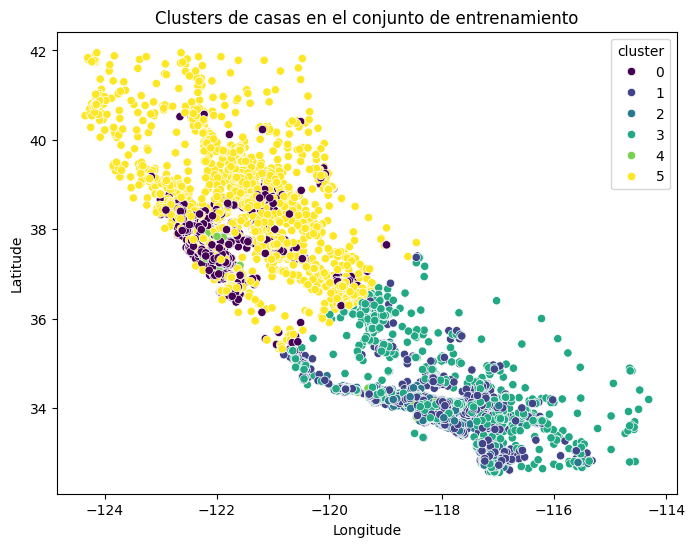

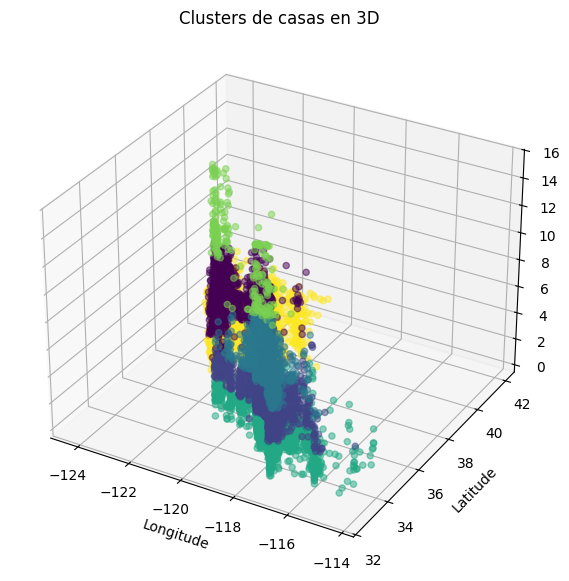

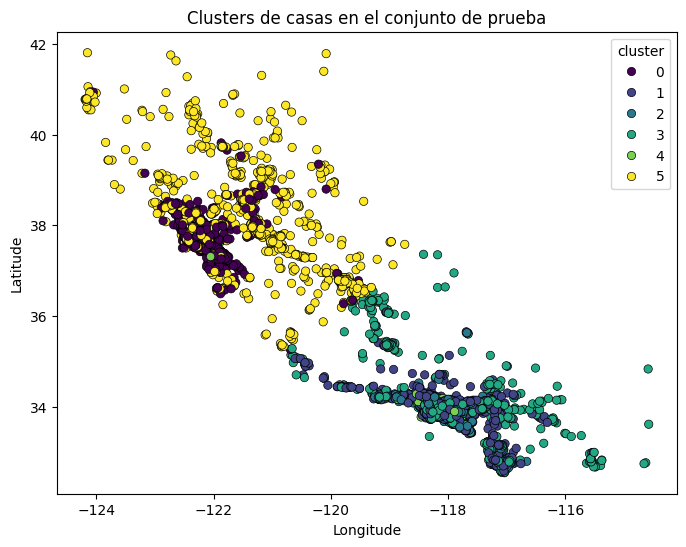

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



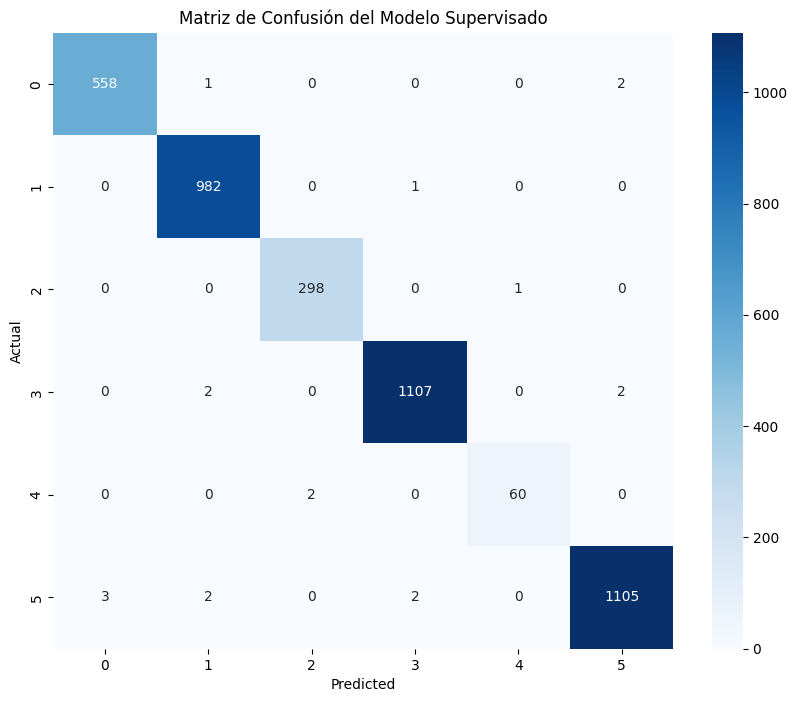

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, silhouette_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Cargar datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)

# Seleccionar columnas de interés
data = data[['Latitude', 'Longitude', 'MedInc']]

# Dividir datos en train y test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# KMeans Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(train_data)
train_data['cluster'] = kmeans.labels_

# Índice de Silueta
silhouette_avg = silhouette_score(train_data[['Latitude', 'Longitude', 'MedInc']], train_data['cluster'])
print(f'Índice de Silueta: {silhouette_avg:.4f}')

# Visualización 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='cluster', data=train_data, palette='viridis')
plt.title('Clusters de casas en el conjunto de entrenamiento')
plt.show()

# Visualización 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data['Longitude'], train_data['Latitude'], train_data['MedInc'], c=train_data['cluster'], cmap='viridis', alpha=0.5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')
plt.title('Clusters de casas en 3D')
plt.show()

# Predecir clusters en conjunto de prueba
test_data['cluster'] = kmeans.predict(test_data[['Latitude', 'Longitude', 'MedInc']])

# Visualización clusters en conjunto de prueba
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='cluster', data=test_data, palette='viridis', edgecolor='k')
plt.title('Clusters de casas en el conjunto de prueba')
plt.show()

# Entrenamiento de modelo supervisado
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]
y_train = train_data['cluster']
X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['cluster']

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluación del modelo
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión del Modelo Supervisado')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

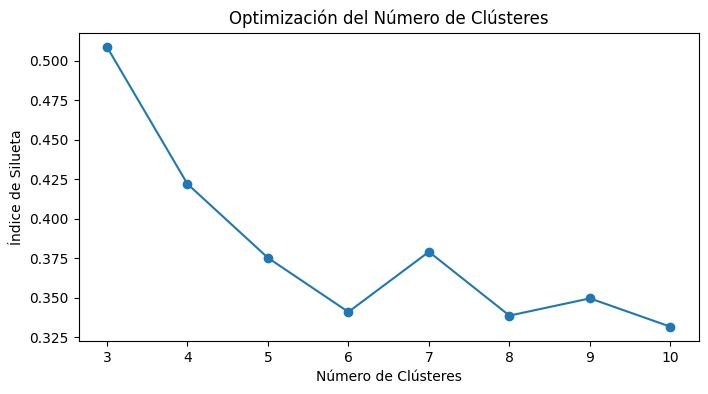

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
0.99418614907469
Cross-Validation Scores: [0.99455041 0.99212837 0.9954573  0.99303452 0.99576015]
Mean CV Score: 0.99418614907469


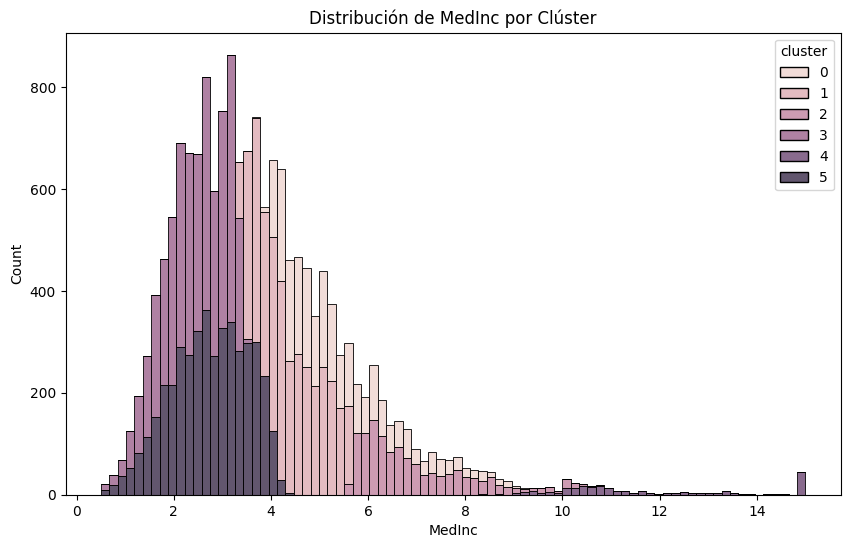

  cluster   Latitude             Longitude               MedInc          
                mean       std        mean       std       mean       std
0       0  37.686925  0.572868 -121.915650  0.607609   5.380158  1.124744
1       1  33.889414  0.562057 -118.002840  0.691385   4.348026  0.631529
2       2  33.849680  0.440044 -118.041547  0.597993   6.939476  1.110431
3       3  34.041557  0.765354 -118.024263  0.867471   2.428376  0.622707
4       4  35.878171  1.809735 -120.284228  1.948316  11.748734  1.908435
5       5  38.143742  1.095460 -121.623042  0.988019   2.740572  0.781223


In [16]:
# Paso 1: Probar diferentes números de clústeres para K-Means
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(3, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(train_data[['Latitude', 'Longitude', 'MedInc']])
    score = silhouette_score(train_data[['Latitude', 'Longitude', 'MedInc']], kmeans.labels_)
    silhouette_scores.append((n_clusters, score))

# Visualizar los resultados
plt.figure(figsize=(8, 4))
plt.plot(range(3, 11), [score for n_clusters, score in silhouette_scores], marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Índice de Silueta')
plt.title('Optimización del Número de Clústeres')
plt.show()

# Paso 2: Probar otros modelos supervisados y tuning de hyperparámetros
from sklearn.model_selection import GridSearchCV

# Ejemplo con Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)

# Paso 3: Validación Cruzada
from sklearn.model_selection import cross_val_score

# Validación cruzada con el mejor modelo encontrado
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Paso 4: Visualizaciones adicionales
import seaborn as sns

# Distribuciones de clústeres
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='MedInc', hue='cluster', multiple='stack')
plt.title('Distribución de MedInc por Clúster')
plt.show()

# Perfiles de clústeres
cluster_profiles = train_data.groupby('cluster').agg({
    'Latitude': ['mean', 'std'],
    'Longitude': ['mean', 'std'],
    'MedInc': ['mean', 'std']
}).reset_index()

print(cluster_profiles)

       Latitude  Longitude  MedInc
14196     32.71    -117.03  3.2596
8267      33.77    -118.16  3.8125
17445     34.66    -120.48  4.1563
14265     32.69    -117.11  1.9425
2271      36.78    -119.80  3.5542
       Latitude  Longitude  MedInc
20046     36.06    -119.01  1.6812
3024      35.14    -119.46  2.5313
15663     37.80    -122.44  3.4801
20484     34.28    -118.72  5.7376
9814      36.62    -121.93  3.7250


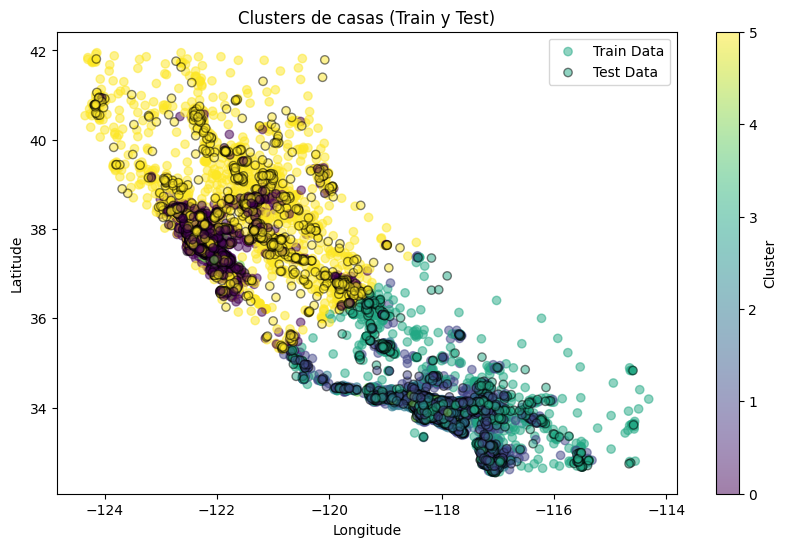

[[ 558    1    0    0    0    2]
 [   0  982    0    1    0    0]
 [   0    0  298    0    1    0]
 [   0    2    0 1107    0    2]
 [   0    0    2    0   60    0]
 [   3    2    0    2    0 1105]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



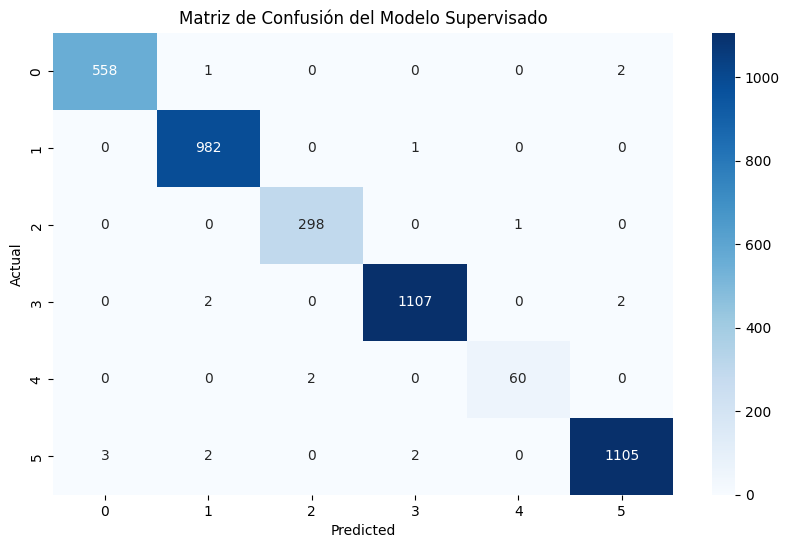

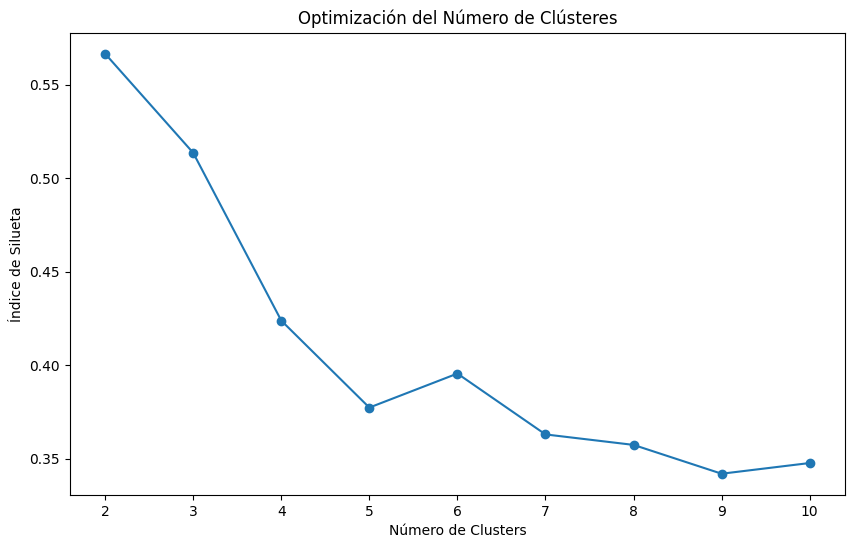

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)

# Seleccionar solo las columnas de interés
data = data[['Latitude', 'Longitude', 'MedInc']]

# Dividir el conjunto de datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Visualizar las primeras filas del conjunto de entrenamiento y prueba
print(train_data.head())
print(test_data.head())

# Construir el modelo K-Means
kmeans_model = KMeans(n_clusters=6, random_state=42)
train_data['Cluster'] = kmeans_model.fit_predict(train_data[['Latitude', 'Longitude', 'MedInc']])
test_data['Cluster'] = kmeans_model.predict(test_data[['Latitude', 'Longitude', 'MedInc']])

# Guardar el modelo K-Means
joblib.dump(kmeans_model, 'kmeans_model.pkl')

# Visualizar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['Cluster'], cmap='viridis', label='Train Data', alpha=0.5)
plt.scatter(test_data['Longitude'], test_data['Latitude'], c=test_data['Cluster'], cmap='viridis', label='Test Data', edgecolor='k', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas (Train y Test)')
plt.legend()
plt.show()

# Entrenar un modelo de clasificación supervisada
from sklearn.ensemble import RandomForestClassifier

# Preparar los datos para el modelo supervisado
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]
y_train = train_data['Cluster']
X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['Cluster']

# Entrenar el modelo
supervised_model = RandomForestClassifier(random_state=42)
supervised_model.fit(X_train, y_train)

# Guardar el modelo supervisado
joblib.dump(supervised_model, 'supervised_model.pkl')

# Predicciones y evaluación del modelo supervisado
y_pred = supervised_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión del Modelo Supervisado')
plt.show()

# Índice de silueta para determinar el número óptimo de clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data[['Latitude', 'Longitude', 'MedInc']])
    silhouette_scores.append(silhouette_score(data[['Latitude', 'Longitude', 'MedInc']], cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silueta')
plt.title('Optimización del Número de Clústeres')
plt.show()